# Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data Inspection

In [2]:
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Test_set.xlsx")

In [3]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
train= train.drop(['Additional_Info','Total_Stops'], axis = 1)
test= test.drop(['Additional_Info','Total_Stops'], axis=1)

In [6]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,12648


In [7]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m
...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m


In [8]:
train.shape,test.shape

((10683, 9), (2671, 8))

In [9]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
dtype: float64

In [10]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Price              0.000000
dtype: float64

In [11]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 8
Numerical Features in Train Set: 1


In [12]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 8
Numerical Features in Test Set: 0


# Exploratory Data Analysis

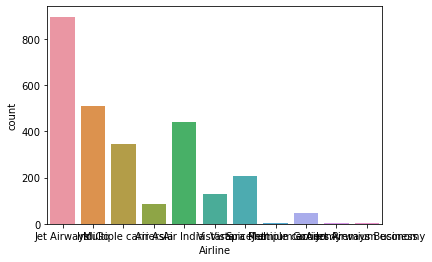

In [13]:
sns.countplot(test['Airline'])
plt.show()

* Jet airways are having major customers

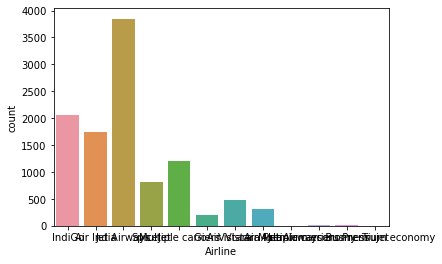

In [14]:
sns.countplot(train['Airline'])
plt.show()

* Jet airways are having major customers

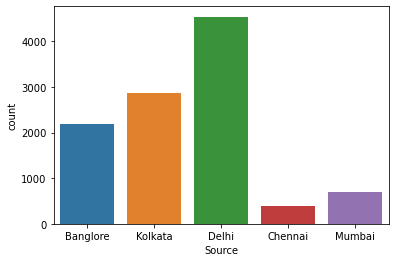

In [15]:
sns.countplot(train['Source'])
plt.show()

* Delhi is the source from where majority of the flights are going 

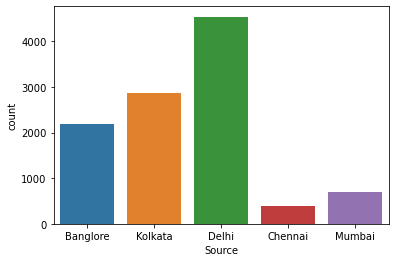

In [16]:
sns.countplot(train['Source'])
plt.show()

* Delhi is the source from where majority of the flights are going

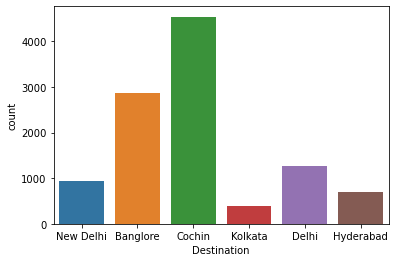

In [17]:
sns.countplot(train['Destination'])
plt.show()

* In our train data majority of the destinations are in cochin

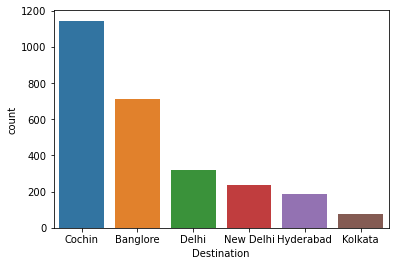

In [18]:
sns.countplot(test['Destination'])
plt.show()

* In our test data majority of the destinations are in cochin

# Feature Engineering

In [19]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Price              0
dtype: int64

In [20]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
dtype: int64

In [21]:
train = train.dropna(axis=1)

In [22]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Price              0
dtype: int64

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Price            10683 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 667.8+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
dtypes: object(8)
memory usage: 167.1+ KB


In [25]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['Airline']= label_encoder.fit_transform(train['Airline'])
train['Date_of_Journey']= label_encoder.fit_transform(train['Date_of_Journey'])
train['Source']= label_encoder.fit_transform(train['Source'])
train['Destination']= label_encoder.fit_transform(train['Destination'])
train['Dep_Time']= label_encoder.fit_transform(train['Dep_Time'])
train['Arrival_Time']= label_encoder.fit_transform(train['Arrival_Time'])
train['Duration']= label_encoder.fit_transform(train['Duration'])
test['Route']= label_encoder.fit_transform(test['Route'])


train['Airline'].unique()
train['Date_of_Journey'].unique()
train['Source'].unique()
train['Destination'].unique()
train['Dep_Time'].unique()
train['Arrival_Time'].unique()
train['Duration'].unique()

array([240, 336, 106, 311, 303, 235,  65, 145, 185, 341,  38, 237, 233,
        25, 198, 300, 151, 156, 128, 308,  63, 241,  39,  61, 315, 317,
        40, 146, 312,   4, 309, 236, 322,  22,  23, 349, 155, 239,  24,
        83, 116, 282, 183, 280,  74,  71, 325, 191,  28, 206,   2,   5,
       121, 120, 197, 335,  41, 307, 117,  57, 238, 147, 362,   0, 137,
       103,  27,  95, 358,  88,  78,  26, 337, 168, 354, 333,  53, 245,
        60,  32,   1,  64,  59, 125, 157,  96,  72, 234, 344,  82, 281,
        48, 165, 141, 136,   9, 346, 350,  21, 209, 348, 132, 304, 345,
       172, 162, 188, 193, 222, 182, 359, 357, 288,  17, 361,  89, 318,
       189, 123,  36,  99, 169, 305, 186, 323, 102, 110, 226, 367,   8,
        19, 154, 274, 187,  46, 351, 161,  30, 170, 119,  12,  14,  54,
        34, 356, 339,  20, 178,  94, 231, 148,  55, 334, 124, 130, 204,
       173, 127, 313,  56, 314, 306,  70, 340, 218, 298, 285, 353, 164,
       176, 140, 355, 324,  69, 196, 177, 192, 167, 342, 195, 15

In [26]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test['Airline']= label_encoder.fit_transform(test['Airline'])
test['Date_of_Journey']= label_encoder.fit_transform(test['Date_of_Journey'])
test['Source']= label_encoder.fit_transform(test['Source'])
test['Destination']= label_encoder.fit_transform(test['Destination'])
test['Dep_Time']= label_encoder.fit_transform(test['Dep_Time'])
test['Arrival_Time']= label_encoder.fit_transform(test['Arrival_Time'])
test['Duration']= label_encoder.fit_transform(test['Duration'])
test['Route']= label_encoder.fit_transform(test['Route'])


test['Airline'].unique()
test['Date_of_Journey'].unique()
test['Source'].unique()
test['Destination'].unique()
test['Dep_Time'].unique()
test['Arrival_Time'].unique()
test['Duration'].unique()
test['Route'].unique()

array([76, 65, 16, 24, 57, 43, 45, 92, 83,  5, 51, 88, 74, 33, 68, 99, 46,
       75, 84, 93, 60, 50, 78, 62, 91, 58, 77, 56, 15, 10, 40,  0, 30, 80,
       87, 82, 52, 18,  4, 85, 70, 96, 94, 67, 20,  8,  6, 69, 39, 21, 61,
       47, 72, 25, 73, 19,  3, 79, 71, 48, 23, 64, 97, 14, 98, 29, 44, 89,
       95, 81,  7,  2, 36, 55, 11,  1, 37, 54, 90, 63, 66, 35, 13, 27, 49,
       31, 34, 53, 17,  9, 86, 41, 26, 22, 38, 28, 12, 42, 59, 32],
      dtype=int64)

In [27]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration
0,4,39,2,1,76,138,150,10
1,3,10,3,0,65,31,353,248
2,4,22,2,1,76,156,566,148
3,6,22,2,1,76,48,633,36
4,0,27,0,2,16,198,135,216
...,...,...,...,...,...,...,...,...
2666,1,39,3,0,51,170,617,150
2667,3,28,3,0,43,106,507,213
2668,4,36,2,1,76,183,151,278
2669,1,36,2,1,76,11,577,60


In [28]:
test.to_csv('test.csv')

# Building Model

In [29]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Price
0,3,24,0,5,211,233,240,3897
1,1,6,3,0,31,906,336,7662
2,4,43,2,1,70,413,106,13882
3,3,10,3,0,164,1324,311,6218
4,3,0,0,5,149,1237,303,13302


In [30]:
X= train.drop(columns = ['Price'], axis=1)
y= train['Price']

In [31]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [32]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [33]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []

In [34]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [35]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [36]:
evaluation

,Model,RMSE
0,Linear Regression,4344.098647
1,Ridge Regression,4344.100540
2,Lasso Regression,4344.136686
3,K Neighbors Regressor,3115.530096
4,Decision Tree Regressor,2624.205989


In [37]:
submission = pd.read_csv('test.csv')
model = DecisionTreeRegressor()
model.fit(X, y)
final_predictions = model.predict(test)
submission['Price'] = final_predictions
#only positive predictions for the target variable
submission['Price'] = submission['Price'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)

ValueError: X has 8 features, but DecisionTreeRegressor is expecting 7 features as input.